# Explore Xradar Functionality

## Imports

In [48]:
import xarray as xr
import xradar as xrad
import xoak
import pyart
import numpy as np

## Read file and convert to xradar

In [15]:
filename = pyart.testing.get_test_data('swx_20120520_0641.nc')

In [16]:
radar = pyart.io.read(filename)

In [97]:
radar_dict = xrad.convert_to_xradar(radar)
radar_dict

## Basic Plotting

In [102]:
ds = radar_dict["0"].sortby("azimuth")

### Plot a Lat/Lon Map

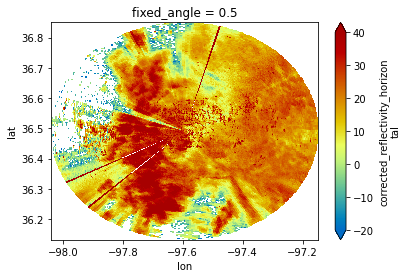

In [105]:
ds.corrected_reflectivity_horizontal.plot(x='lon',
                                          y='lat',
                                          vmin=-20,
                                          vmax=40,
                                          cmap='pyart_HomeyerRainbow')

It appears there is some precipitation around 270 degrees (west)

### Plot a Single Azimuth

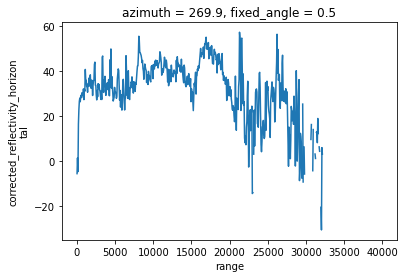

In [103]:
subset = ds.sel(azimuth=270, method='nearest')
subset.corrected_reflectivity_horizontal.plot()

## Replicate the RadarMapDisplay and RadarDisplay
Let's try wrapping these into classes!

In [91]:
class RadarMapDisplay():
    def __init__(self, xradar):
        self.xradar = xradar

    def plot_ppi(self, field, sweep=0, **kwargs):
        ds = self.xradar[str(sweep)]
        return ds[field].plot(x='lon',
                              y='lat',
                              **kwargs)
    
class RadarDisplay():
    def __init__(self, xradar):
        self.xradar = xradar

    def plot_ppi(self, field, sweep=0, **kwargs):
        ds = self.xradar[str(sweep)]
        return ds[field].plot(x='x',
                              y='y',
                              **kwargs)

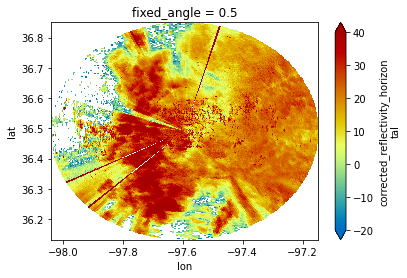

In [106]:
display = RadarMapDisplay(radar_dict)

display.plot_ppi("corrected_reflectivity_horizontal",
                 0,
                 vmin=-20,
                 vmax=40,
                 cmap='pyart_HomeyerRainbow')

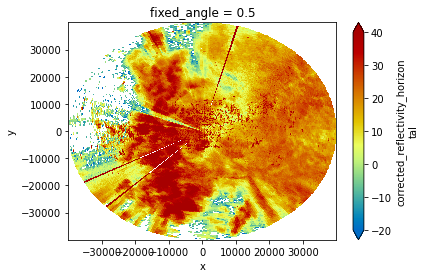

In [107]:
display = RadarDisplay(radar_dict)

display.plot_ppi("corrected_reflectivity_horizontal",
                 0,
                 vmin=-20,
                 vmax=40,
                 cmap='pyart_HomeyerRainbow')

## Subset Points in a Sweep
We can use xoak to deal with flexible indexes in xarray

In [36]:
ds.xoak.set_index(['lat', 'lon'], 'sklearn_geo_balltree')

In [59]:
ds_trajectory = xr.Dataset({
    'latitude': ('trajectory', np.linspace(36.2, 36.8, 20)),
    'longitude': ('trajectory', np.linspace(-98., -97.2, 20))
})

In [60]:
ds_selection = ds.xoak.sel(lat=ds_trajectory.latitude,
                           lon=ds_trajectory.longitude)

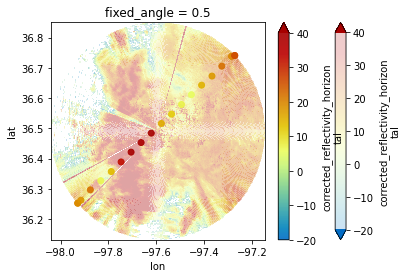

In [72]:
ds.corrected_reflectivity_horizontal.plot(x='lon',
                                          y='lat',
                                          alpha=0.2,
                                          vmin=-20,
                                          vmax=40,
                                          cmap='pyart_HomeyerRainbow')

ds_selection.plot.scatter(x='lon',
                          y='lat',
                          hue='corrected_reflectivity_horizontal',
                          alpha=0.9,
                          vmin=-20,
                          vmax=40,
                          cmap='pyart_HomeyerRainbow');